In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("C:/Users/richa/DropBox_iovi/Dropbox/DataScience/TimeSeries/AV/Train_SU63ISt.csv")
test = pd.read_csv("C:/Users/richa/DropBox_iovi/Dropbox/DataScience/TimeSeries/AV/Test_0qrQsBZ.csv")

In [3]:
train_orig = train.copy()
test_orig = test.copy()

In [4]:
print(train.columns)
print()
print(test.columns)

Index(['ID', 'Datetime', 'Count'], dtype='object')

Index(['ID', 'Datetime'], dtype='object')


Let's look at the datatype of each feature

In [5]:
print(train.dtypes)
print()
print(test.dtypes)

ID           int64
Datetime    object
Count        int64
dtype: object

ID           int64
Datetime    object
dtype: object


In [6]:
print(train.shape)
print()
print(test.shape)

(18288, 3)

(5112, 2)


# Feature extraction

change the Datetime column to datetime type

In [7]:
train["Datetime"] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test["Datetime"] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
train_orig["Datetime"] = pd.to_datetime(train_orig.Datetime, format='%d-%m-%Y %H:%M')
test_orig["Datetime"] = pd.to_datetime(test_orig.Datetime, format='%d-%m-%Y %H:%M')

In [8]:
print(train.dtypes)
print()
print(test.dtypes)

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

ID                   int64
Datetime    datetime64[ns]
dtype: object


In [9]:
for i in (train, test, train_orig, test_orig):
    i["year"] = i.Datetime.dt.year
    i["month"] = i.Datetime.dt.month
    i["day"] = i.Datetime.dt.day
    i["hour"] = i.Datetime.dt.hour

make weekend variable

In [10]:
train["dayofweek"] = train["Datetime"].dt.dayofweek
temp = train["Datetime"]

values 5 and 6 are weekend days; 
assign 1 if the day is weekend else 0

In [11]:
def applyer(row):
    if row.dayofweek==6 or row.dayofweek==5:
        return 1
    else:
        return 0

temp2 = train["Datetime"].apply(applyer)
train["weekend"] = temp2

In [12]:
print(train.head(30))

    ID            Datetime  Count  year  month  day  hour  dayofweek  weekend
0    0 2012-08-25 00:00:00      8  2012      8   25     0          5        1
1    1 2012-08-25 01:00:00      2  2012      8   25     1          5        1
2    2 2012-08-25 02:00:00      6  2012      8   25     2          5        1
3    3 2012-08-25 03:00:00      2  2012      8   25     3          5        1
4    4 2012-08-25 04:00:00      2  2012      8   25     4          5        1
5    5 2012-08-25 05:00:00      2  2012      8   25     5          5        1
6    6 2012-08-25 06:00:00      2  2012      8   25     6          5        1
7    7 2012-08-25 07:00:00      2  2012      8   25     7          5        1
8    8 2012-08-25 08:00:00      6  2012      8   25     8          5        1
9    9 2012-08-25 09:00:00      2  2012      8   25     9          5        1
10  10 2012-08-25 10:00:00      2  2012      8   25    10          5        1
11  11 2012-08-25 11:00:00      6  2012      8   25    11       

change the index and plot the graph

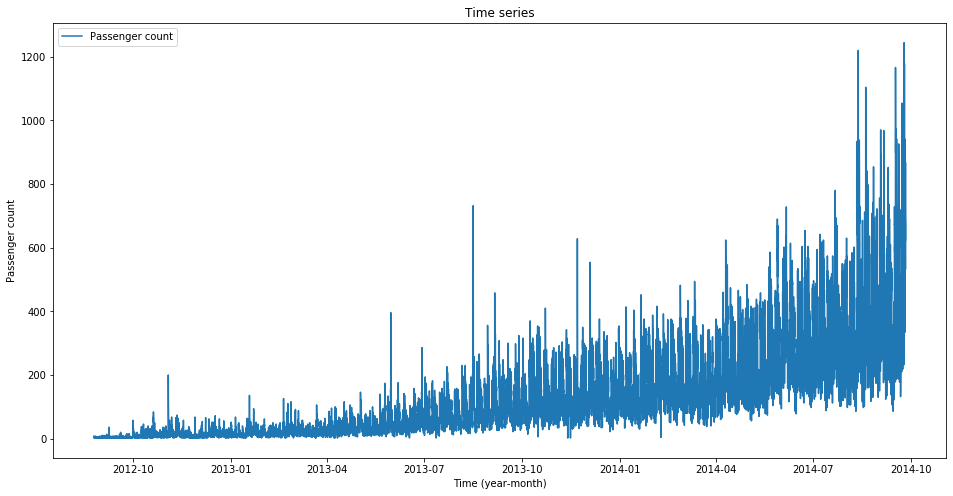

In [13]:
train.index = train["Datetime"]
df = train.drop("ID", 1)
ts = df.Count
plt.figure(figsize=(16,8))
plt.plot(ts, label="Passenger count")
plt.title("Time series")
plt.xlabel("Time (year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

# Exploratory Analysis

Hypotéza: počet pasažérů meziročně roste

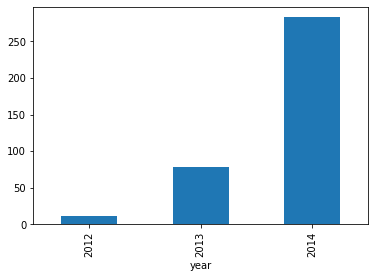

In [14]:
train.groupby("year")["Count"].mean().plot.bar()

Hypotéza: počet pasažérů je nižší v období říjen - březen

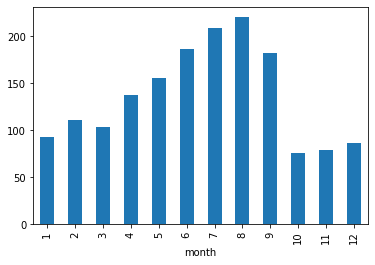

In [15]:
train.groupby("month")["Count"].mean().plot.bar()

investigate monthly mean each year separately

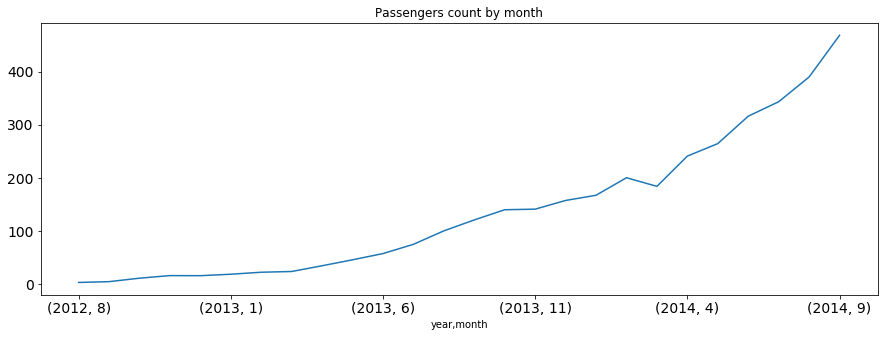

In [16]:
temp = train.groupby(["year", "month"])["Count"].mean()
temp.plot(figsize=(15,5), title="Passengers count by month", fontsize=14)

Data pro 9 - 12 / 2014 chybí, naopak jsou data pro 8 - 12 / 2012 -> významně zkresluje předchozí graf!!!

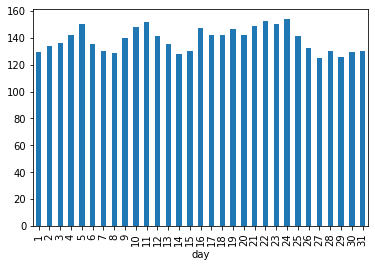

In [17]:
train.groupby("day")["Count"].mean().plot.bar()

investigate daily hours mean

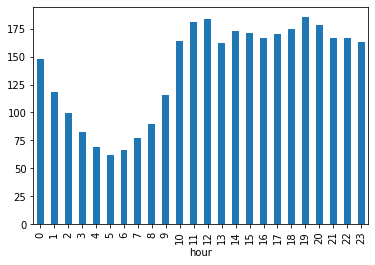

In [18]:
train.groupby("hour")["Count"].mean().plot.bar()

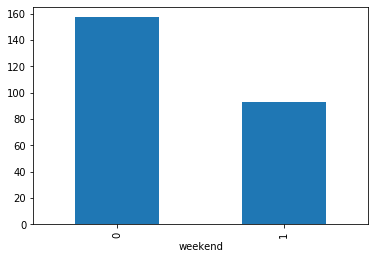

In [19]:
train.groupby("weekend")["Count"].mean().plot.bar()

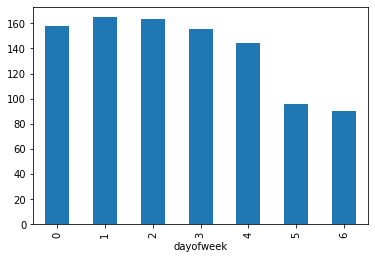

In [20]:
train.groupby("dayofweek")["Count"].mean().plot.bar()

In [21]:
train = train.drop("ID", 1)

reduce the noise of hourly time series

In [22]:
train.Timestamp = pd.to_datetime(train["Datetime"], format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

hourly time series mean

In [23]:
hourly = train.resample("H").mean()

daily time series mean

In [24]:
daily = train.resample("D").mean()

weekly time series mean

In [25]:
weekly = train.resample("W").mean()

monthly time series mean

In [26]:
monthly = train.resample("M").mean()

plot the new time series

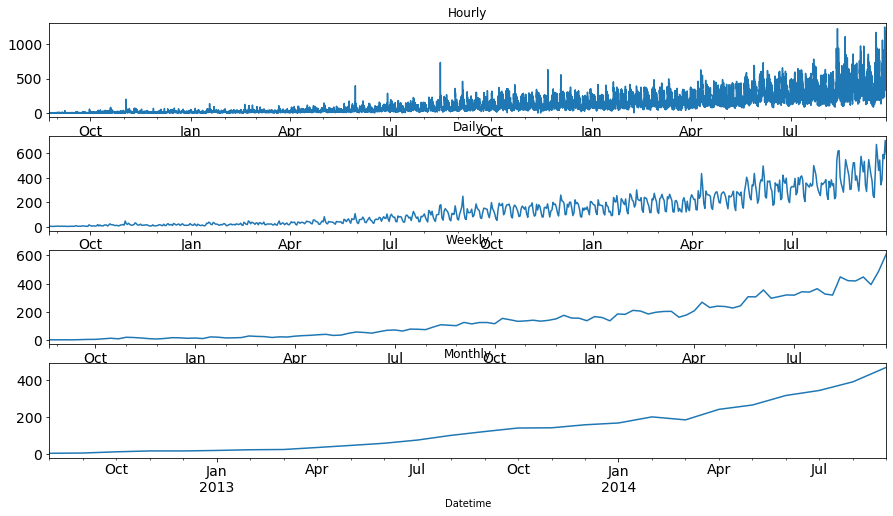

In [27]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title="Hourly", fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title="Daily", fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title="Weekly", fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title="Monthly", fontsize=14, ax=axs[3])
plt.show()

prepare the test datase

In [28]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

converting to daily mean

In [29]:
print(test.head())

                        ID            Datetime  year  month  day  hour
Datetime                                                              
2014-09-26 00:00:00  18288 2014-09-26 00:00:00  2014      9   26     0
2014-09-26 01:00:00  18289 2014-09-26 01:00:00  2014      9   26     1
2014-09-26 02:00:00  18290 2014-09-26 02:00:00  2014      9   26     2
2014-09-26 03:00:00  18291 2014-09-26 03:00:00  2014      9   26     3
2014-09-26 04:00:00  18292 2014-09-26 04:00:00  2014      9   26     4


In [30]:
test = test.resample("D").mean()
print(test.head())

                 ID    year  month   day  hour
Datetime                                      
2014-09-26  18299.5  2014.0    9.0  26.0  11.5
2014-09-27  18323.5  2014.0    9.0  27.0  11.5
2014-09-28  18347.5  2014.0    9.0  28.0  11.5
2014-09-29  18371.5  2014.0    9.0  29.0  11.5
2014-09-30  18395.5  2014.0    9.0  30.0  11.5


In [31]:
train = train.resample("D").mean()
print(train.head())

               Count    year  month   day  hour  dayofweek  weekend
Datetime                                                           
2012-08-25  3.166667  2012.0    8.0  25.0  11.5        5.0      1.0
2012-08-26  3.666667  2012.0    8.0  26.0  11.5        6.0      1.0
2012-08-27  2.583333  2012.0    8.0  27.0  11.5        0.0      0.0
2012-08-28  2.416667  2012.0    8.0  28.0  11.5        1.0      0.0
2012-08-29  2.500000  2012.0    8.0  29.0  11.5        2.0      0.0


# Splitting the data into training and validation part

In [33]:
Train = train.loc["2012-08-25":"2014-06-24"]
valid = train.loc["2014-06-25":"2014-09-25"]

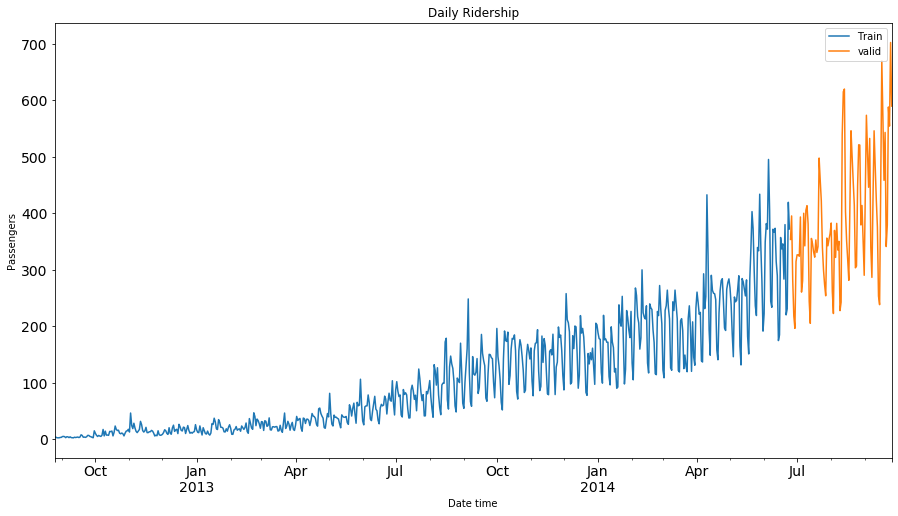

In [35]:
Train.Count.plot(figsize=(15,8), title="Daily Ridership", fontsize=14, label="Train")
valid.Count.plot(figsize=(15,8), title="Daily Ridership", fontsize=14, label="valid")
plt.xlabel("Date time")
plt.ylabel("Passengers")
plt.legend(loc="best")
plt.show()